In [ ]:
import pandas as pd

In [ ]:
data=pd.read_csv("dreaddit-train.csv")
testdata=pd.read_csv("dreaddit-test.csv")
data.head()

,subreddit,post_id,sentence_range,text,id,label,confidence,social_timestamp,social_karma,syntax_ari,...,lex_dal_min_pleasantness,lex_dal_min_activation,lex_dal_min_imagery,lex_dal_avg_activation,lex_dal_avg_imagery,lex_dal_avg_pleasantness,social_upvote_ratio,social_num_comments,syntax_fk_grade,sentiment
0,ptsd,8601tu,"(15, 20)","He said he had not felt that way before, sugge...",33181,1,0.8,1521614353,5,1.806818,...,1.000,1.1250,1.0,1.77000,1.52211,1.89556,0.86,1,3.253573,-0.002742
1,assistance,8lbrx9,"(0, 5)","Hey there r/assistance, Not sure if this is th...",2606,0,1.0,1527009817,4,9.429737,...,1.125,1.0000,1.0,1.69586,1.62045,1.88919,0.65,2,8.828316,0.292857
2,ptsd,9ch1zh,"(15, 20)",My mom then hit me with the newspaper and it s...,38816,1,0.8,1535935605,2,7.769821,...,1.000,1.1429,1.0,1.83088,1.58108,1.85828,0.67,0,7.841667,0.011894
3,relationships,7rorpp,"[5, 10]","until i met my new boyfriend, he is amazing, h...",239,1,0.6,1516429555,0,2.667798,...,1.000,1.1250,1.0,1.75356,1.52114,1.98848,0.50,5,4.104027,0.141671
4,survivorsofabuse,9p2gbc,"[0, 5]",October is Domestic Violence Awareness Month a...,1421,1,0.8,1539809005,24,7.554238,...,1.000,1.1250,1.0,1.77644,1.64872,1.81456,1.00,1,7.910952,-0.204167


In [ ]:
data=data[data.subreddit!='food_pantry']

In [ ]:
print(data.columns)

Index(['subreddit', 'post_id', 'sentence_range', 'text', 'id', 'label',
       'confidence', 'social_timestamp', 'social_karma', 'syntax_ari',
       ...
       'lex_dal_min_pleasantness', 'lex_dal_min_activation',
       'lex_dal_min_imagery', 'lex_dal_avg_activation', 'lex_dal_avg_imagery',
       'lex_dal_avg_pleasantness', 'social_upvote_ratio',
       'social_num_comments', 'syntax_fk_grade', 'sentiment'],
      dtype='object', length=116)


In [ ]:
#TRAINING DATA SIZE
print(data.shape)

(2801, 116)


In [ ]:
#TEST DATA SIZE
print(testdata.shape)

(715, 116)


TEXT PRE-PROCESSING

In [ ]:
#Removing Punctuations
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [ ]:
#Function defining punctuation less string
def punctuation_less(celltext):
  string_free="".join([i for i in celltext if i not in string.punctuation])
  return string_free

In [ ]:
#calling the function
data['punc_free']=data['text'].apply(lambda x:punctuation_less(x))
#data.head()
data['text'].head()   #before we remove the punctuation

0    He said he had not felt that way before, sugge...
1    Hey there r/assistance, Not sure if this is th...
2    My mom then hit me with the newspaper and it s...
3    until i met my new boyfriend, he is amazing, h...
4    October is Domestic Violence Awareness Month a...
Name: text, dtype: object

After removal of punctuation we get the output as

In [ ]:
data['punc_free'].head()

0    He said he had not felt that way before sugget...
1    Hey there rassistance Not sure if this is the ...
2    My mom then hit me with the newspaper and it s...
3    until i met my new boyfriend he is amazing he ...
4    October is Domestic Violence Awareness Month a...
Name: punc_free, dtype: object

Step 2 in Lowercasing of text

In [ ]:
data['lower_celltext']=data['punc_free'].apply(lambda x:x.lower())
data['lower_celltext'].head()

0    he said he had not felt that way before sugget...
1    hey there rassistance not sure if this is the ...
2    my mom then hit me with the newspaper and it s...
3    until i met my new boyfriend he is amazing he ...
4    october is domestic violence awareness month a...
Name: lower_celltext, dtype: object

Using the re package for Tokenizing the text

In [ ]:
import re
import nltk
nltk.download()

NLTK Downloader
---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------
Downloader> q


True

In [ ]:
def tokenization(text):
  tokens=re.split('\s+',text)
  return tokens
#applying function to the column
data['msg_tokens']=data['lower_celltext'].apply(lambda x: tokenization(x))
data.head()


,subreddit,post_id,sentence_range,text,id,label,confidence,social_timestamp,social_karma,syntax_ari,...,lex_dal_avg_activation,lex_dal_avg_imagery,lex_dal_avg_pleasantness,social_upvote_ratio,social_num_comments,syntax_fk_grade,sentiment,punc_free,lower_celltext,msg_tokens
0,ptsd,8601tu,"(15, 20)","He said he had not felt that way before, sugge...",33181,1,0.8,1521614353,5,1.806818,...,1.77000,1.52211,1.89556,0.86,1,3.253573,-0.002742,He said he had not felt that way before sugget...,he said he had not felt that way before sugget...,"[he, said, he, had, not, felt, that, way, befo..."
1,assistance,8lbrx9,"(0, 5)","Hey there r/assistance, Not sure if this is th...",2606,0,1.0,1527009817,4,9.429737,...,1.69586,1.62045,1.88919,0.65,2,8.828316,0.292857,Hey there rassistance Not sure if this is the ...,hey there rassistance not sure if this is the ...,"[hey, there, rassistance, not, sure, if, this,..."
2,ptsd,9ch1zh,"(15, 20)",My mom then hit me with the newspaper and it s...,38816,1,0.8,1535935605,2,7.769821,...,1.83088,1.58108,1.85828,0.67,0,7.841667,0.011894,My mom then hit me with the newspaper and it s...,my mom then hit me with the newspaper and it s...,"[my, mom, then, hit, me, with, the, newspaper,..."
3,relationships,7rorpp,"[5, 10]","until i met my new boyfriend, he is amazing, h...",239,1,0.6,1516429555,0,2.667798,...,1.75356,1.52114,1.98848,0.50,5,4.104027,0.141671,until i met my new boyfriend he is amazing he ...,until i met my new boyfriend he is amazing he ...,"[until, i, met, my, new, boyfriend, he, is, am..."
4,survivorsofabuse,9p2gbc,"[0, 5]",October is Domestic Violence Awareness Month a...,1421,1,0.8,1539809005,24,7.554238,...,1.77644,1.64872,1.81456,1.00,1,7.910952,-0.204167,October is Domestic Violence Awareness Month a...,october is domestic violence awareness month a...,"[october, is, domestic, violence, awareness, m..."


STOPWORD REMOVAL

In [ ]:
nltk.download('stopwords')
from nltk.corpus import stopwords
print(stopwords.words('english'))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
def remove_stopwords(celltext):
  strem=[i for i in celltext if i not in stopwords.words('english')]
  return strem

In [ ]:
data['stopwords_free']=data['msg_tokens'].apply(lambda x: remove_stopwords(x))
data['stopwords_free'].head()

0    [said, felt, way, suggeted, go, rest, trigger,...
1    [hey, rassistance, sure, right, place, post, g...
2    [mom, hit, newspaper, shocked, would, knows, d...
3    [met, new, boyfriend, amazing, kind, sweet, go...
4    [october, domestic, violence, awareness, month...
Name: stopwords_free, dtype: object

STEMMING THE DATA ie. Removing and replacing suffixes of words to get root form of the word

In [ ]:
from nltk.stem.porter import PorterStemmer
porterstemmer=PorterStemmer()

In [ ]:
def cellstemming(celltext):
  stem_celltext=[porterstemmer.stem(word) for word in celltext]
  return stem_celltext

In [ ]:
#function call for stemming
data['stem_texts']=data['stopwords_free'].apply(lambda x:cellstemming(x))
data['stem_texts'].head()

0    [said, felt, way, sugget, go, rest, trigger, a...
1    [hey, rassist, sure, right, place, post, goe, ...
2    [mom, hit, newspap, shock, would, know, dont, ...
3    [met, new, boyfriend, amaz, kind, sweet, good,...
4    [octob, domest, violenc, awar, month, domest, ...
Name: stem_texts, dtype: object

LEMMATIZATION - Converting to base form (combining all inflected forms of the word to get a single term)

In [ ]:
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


True

In [ ]:
wordnet_lemma=WordNetLemmatizer()
def lemmatizer(celltext):
  lemm_text=[wordnet_lemma.lemmatize(word) for word in celltext]
  return lemm_text

In [ ]:
data['lemmatized_celltext']=data['stopwords_free'].apply(lambda x:lemmatizer(x))
data['lemmatized_celltext'].head()

0    [said, felt, way, suggeted, go, rest, trigger,...
1    [hey, rassistance, sure, right, place, post, g...
2    [mom, hit, newspaper, shocked, would, know, do...
3    [met, new, boyfriend, amazing, kind, sweet, go...
4    [october, domestic, violence, awareness, month...
Name: lemmatized_celltext, dtype: object

OUTPUT AFTER PRE-PROCESSING STAGE

In [ ]:
data[['text','punc_free','lower_celltext','msg_tokens','stopwords_free','stem_texts','lemmatized_celltext']].head()

,text,punc_free,lower_celltext,msg_tokens,stopwords_free,stem_texts,lemmatized_celltext
0,"He said he had not felt that way before, sugge...",He said he had not felt that way before sugget...,he said he had not felt that way before sugget...,"[he, said, he, had, not, felt, that, way, befo...","[said, felt, way, suggeted, go, rest, trigger,...","[said, felt, way, sugget, go, rest, trigger, a...","[said, felt, way, suggeted, go, rest, trigger,..."
1,"Hey there r/assistance, Not sure if this is th...",Hey there rassistance Not sure if this is the ...,hey there rassistance not sure if this is the ...,"[hey, there, rassistance, not, sure, if, this,...","[hey, rassistance, sure, right, place, post, g...","[hey, rassist, sure, right, place, post, goe, ...","[hey, rassistance, sure, right, place, post, g..."
2,My mom then hit me with the newspaper and it s...,My mom then hit me with the newspaper and it s...,my mom then hit me with the newspaper and it s...,"[my, mom, then, hit, me, with, the, newspaper,...","[mom, hit, newspaper, shocked, would, knows, d...","[mom, hit, newspap, shock, would, know, dont, ...","[mom, hit, newspaper, shocked, would, know, do..."
3,"until i met my new boyfriend, he is amazing, h...",until i met my new boyfriend he is amazing he ...,until i met my new boyfriend he is amazing he ...,"[until, i, met, my, new, boyfriend, he, is, am...","[met, new, boyfriend, amazing, kind, sweet, go...","[met, new, boyfriend, amaz, kind, sweet, good,...","[met, new, boyfriend, amazing, kind, sweet, go..."
4,October is Domestic Violence Awareness Month a...,October is Domestic Violence Awareness Month a...,october is domestic violence awareness month a...,"[october, is, domestic, violence, awareness, m...","[october, domestic, violence, awareness, month...","[octob, domest, violenc, awar, month, domest, ...","[october, domestic, violence, awareness, month..."


Term Frequency - Inverse Document Frequency

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
def lemjoin(celltext):
  lem_join=['.'.join(celltext)]
  return lem_join

In [ ]:
data['lemmatized_join']=data['lemmatized_celltext'].apply(lambda x:lemjoin(x))
data['lemmatized_join'].head()

0    [said.felt.way.suggeted.go.rest.trigger.ahead....
1    [hey.rassistance.sure.right.place.post.go.im.c...
2    [mom.hit.newspaper.shocked.would.know.dont.lik...
3    [met.new.boyfriend.amazing.kind.sweet.good.stu...
4    [october.domestic.violence.awareness.month.dom...
Name: lemmatized_join, dtype: object

PRE-PROCESSING THE TEST DATA

In [ ]:
testdata=testdata[testdata.subreddit!='food_pantry']
testdata['punc_free']=testdata['text'].apply(lambda x:punctuation_less(x))
testdata['text'].head()

<ipython-input-27-ed113ad437e5>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  testdata['punc_free']=testdata['text'].apply(lambda x:punctuation_less(x))


0    Its like that, if you want or not.“ ME: I have...
1    I man the front desk and my title is HR Custom...
2    We'd be saving so much money with this new hou...
3    My ex used to shoot back with "Do you want me ...
4    I haven’t said anything to him yet because I’m...
Name: text, dtype: object

In [ ]:
testdata['punc_free'].head()

0    Its like that if you want or not“ ME I have no...
1    I man the front desk and my title is HR Custom...
2    Wed be saving so much money with this new hous...
3    My ex used to shoot back with Do you want me t...
4    I haven’t said anything to him yet because I’m...
Name: punc_free, dtype: object

In [ ]:
#LOWERCASING TEST DATA
testdata['lower_celltext']=testdata['punc_free'].apply(lambda x: x.lower())
testdata['lower_celltext'].head()


0    its like that if you want or not“ me i have no...
1    i man the front desk and my title is hr custom...
2    wed be saving so much money with this new hous...
3    my ex used to shoot back with do you want me t...
4    i haven’t said anything to him yet because i’m...
Name: lower_celltext, dtype: object

In [ ]:
#TOKENIZATION
testdata['lower_celltext']=testdata['punc_free'].apply(lambda x:x.lower())
testdata['lower_celltext'].head()

0    its like that if you want or not“ me i have no...
1    i man the front desk and my title is hr custom...
2    wed be saving so much money with this new hous...
3    my ex used to shoot back with do you want me t...
4    i haven’t said anything to him yet because i’m...
Name: lower_celltext, dtype: object

In [ ]:
#TOKENIZATION - using the already define function for tokenization
testdata['msg_tokens']=testdata['lower_celltext'].apply(lambda x:tokenization(x))

In [ ]:
#REMOVING STOPWORDS
testdata['stopwords_free']=testdata['msg_tokens'].apply(lambda x:remove_stopwords(x))

In [ ]:
#STEMMING TEST DATA
testdata['stem_texts']=testdata['stopwords_free'].apply(lambda x:cellstemming(x))
testdata['stem_texts'].head()

0    [like, want, not“, problem, take, longer, ask,...
1    [man, front, desk, titl, hr, custom, servic, r...
2    [wed, save, much, money, new, housrit, expens,...
3    [ex, use, shoot, back, want, go, time, matter,...
4    [haven’t, said, anyth, yet, i’m, sure, someon,...
Name: stem_texts, dtype: object

In [ ]:
#LEMMATIZATION OF TEST DATA
from nltk.stem import WordNetLemmatizer


In [ ]:
testdata['lemmatized_celltext']=testdata['stopwords_free'].apply(lambda x:lemmatizer(x))
testdata['lemmatized_celltext'].head()

0    [like, want, not“, problem, take, longer, aske...
1    [man, front, desk, title, hr, customer, servic...
2    [wed, saving, much, money, new, housrits, expe...
3    [ex, used, shoot, back, want, go, time, matter...
4    [haven’t, said, anything, yet, i’m, sure, some...
Name: lemmatized_celltext, dtype: object

In [ ]:
testdata['lemmatized_join']=testdata['lemmatized_celltext'].apply(lambda x: lemjoin(x))

CREATING FEATURE VECTORS USING TF-IDF

In [ ]:
print(testdata['lemmatized_join'])

0      [like.want.not“.problem.take.longer.asked.frie...
1      [man.front.desk.title.hr.customer.service.repr...
2      [wed.saving.much.money.new.housrits.expensive....
3      [ex.used.shoot.back.want.go.time.matter.almost...
4      [haven’t.said.anything.yet.i’m.sure.someone.wo...
                             ...                        
710    [horrible.vivid.nightmare.every.night.sometime...
711    [also.cant.think.without.getting.angry.jealous...
712    [furthermore.told.got.really.serious.anxiety.d...
713    [here.link.amazon.wish.list.two.item.url.link....
714    [keep.u.protected.already.told.unwelcome.perso...
Name: lemmatized_join, Length: 709, dtype: object


In [ ]:
vectorizer=TfidfVectorizer(min_df=5,max_df=0.8,sublinear_tf=True,use_idf=True)
train_vectors=vectorizer.fit_transform(data['lemmatized_join'].astype(str))
print(train_vectors)

  (0, 1199)	0.13812216544965925
  (0, 1759)	0.168585071559249
  (0, 1112)	0.16469635572718871
  (0, 1145)	0.16742881942463878
  (0, 2698)	0.16917798090293334
  (0, 2463)	0.18037316685282842
  (0, 1664)	0.09453159891821512
  (0, 1140)	0.15432637171363675
  (0, 2573)	0.2238244386107505
  (0, 2113)	0.18206542208047605
  (0, 1920)	0.163154575147656
  (0, 810)	0.16686483379519948
  (0, 2022)	0.19204348834228283
  (0, 1363)	0.2378877331395816
  (0, 836)	0.09566194259909605
  (0, 571)	0.10773675091163769
  (0, 2228)	0.11323627436624123
  (0, 108)	0.16917798090293334
  (0, 1610)	0.13553433598773207
  (0, 2400)	0.20125923046712493
  (0, 2315)	0.18037316685282842
  (0, 1179)	0.20788585754832073
  (0, 1893)	0.24786579940138836
  (0, 1046)	0.12504991982818703
  (0, 1496)	0.14513662011229544
  :	:
  (2799, 1064)	0.1282016190799879
  (2799, 1661)	0.14980059472952878
  (2799, 2723)	0.09848633061432738
  (2799, 1553)	0.14767352849893547
  (2799, 571)	0.11559289306577696
  (2800, 681)	0.310194962025586

VISUALIZING THE DATA - Data Exploration and Visualization

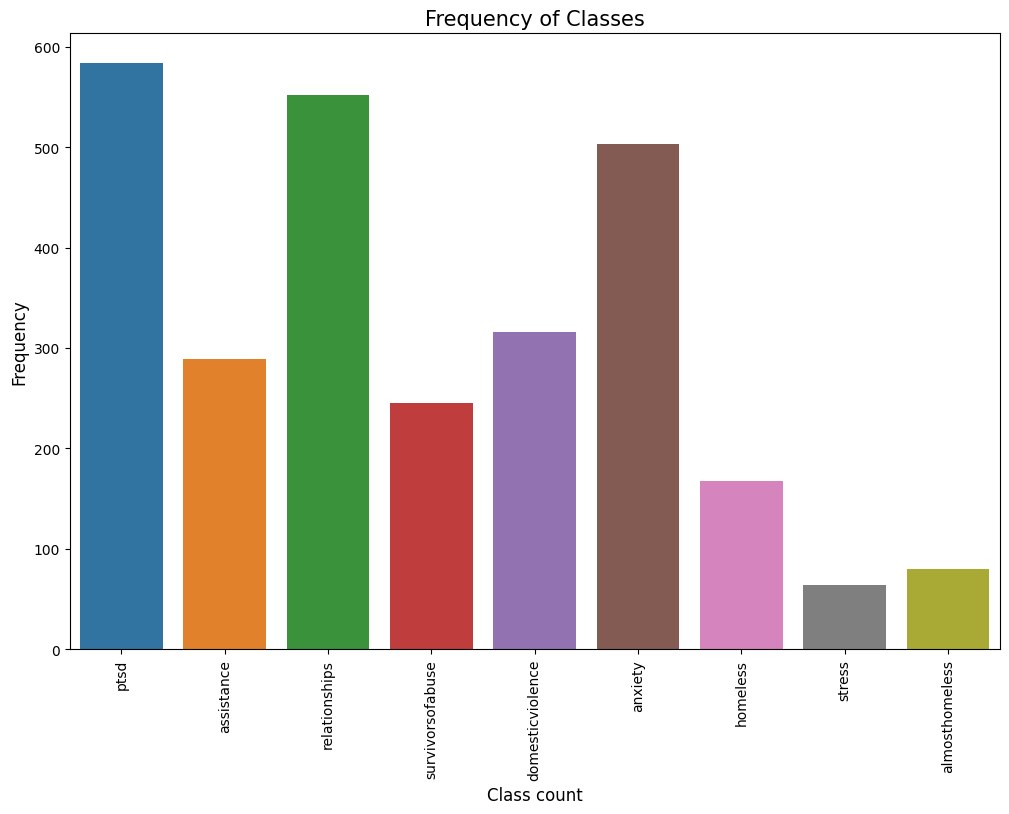

In [ ]:
#data exploration
import matplotlib
import matplotlib.pyplot as plt

import seaborn as sns
color=sns.color_palette()
%matplotlib inline
plt.figure(figsize=(12,8))
sns.countplot(x=data['subreddit'],data=data)
plt.ylabel('Frequency',fontsize=12)
plt.xlabel('Class count',fontsize=12)
plt.xticks(rotation='vertical')
plt.title("Frequency of Classes", fontsize=15)
plt.show()

In [ ]:
#word count
from nltk.tokenize import TweetTokenizer
data["text_num_words"]=data['lemmatized_join'].astype(str).apply(lambda x: len(str(x)))
data["text_num_chars"]=data['lemmatized_join'].apply(lambda x:len(str(x)))

In [ ]:
numWords=[]
for index,row in data.iterrows():
  counter=0
  num_words=row["text_num_words"]
  counter=counter+num_words
  numWords.append(counter)
numSentences=len(numWords)

In [ ]:
print("The total number of sentences is: ",numSentences)
print("The average number of words in the training sentences is: ",sum(numWords)/numSentences)

The total number of sentences is:  2801
The average number of words in the training sentences is:  269.4509103891467


HISTOGRAM PLOTTING

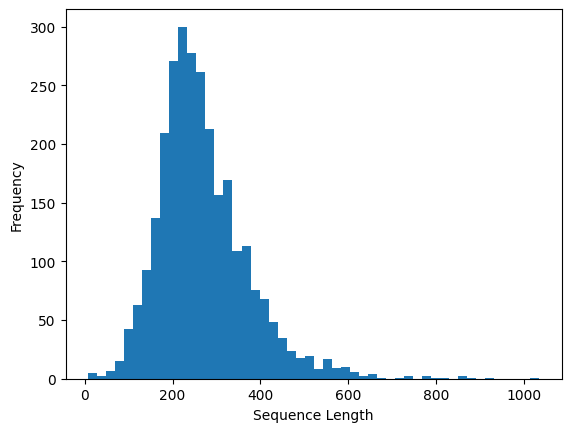

In [ ]:
plt.hist(numWords,50)
plt.xlabel('Sequence Length')
plt.ylabel('Frequency')
plt.show()

SEABORN distplot

<ipython-input-44-e62bde3902cb>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data["text_num_words"].values,bins=50,kde=False,color='yellow')


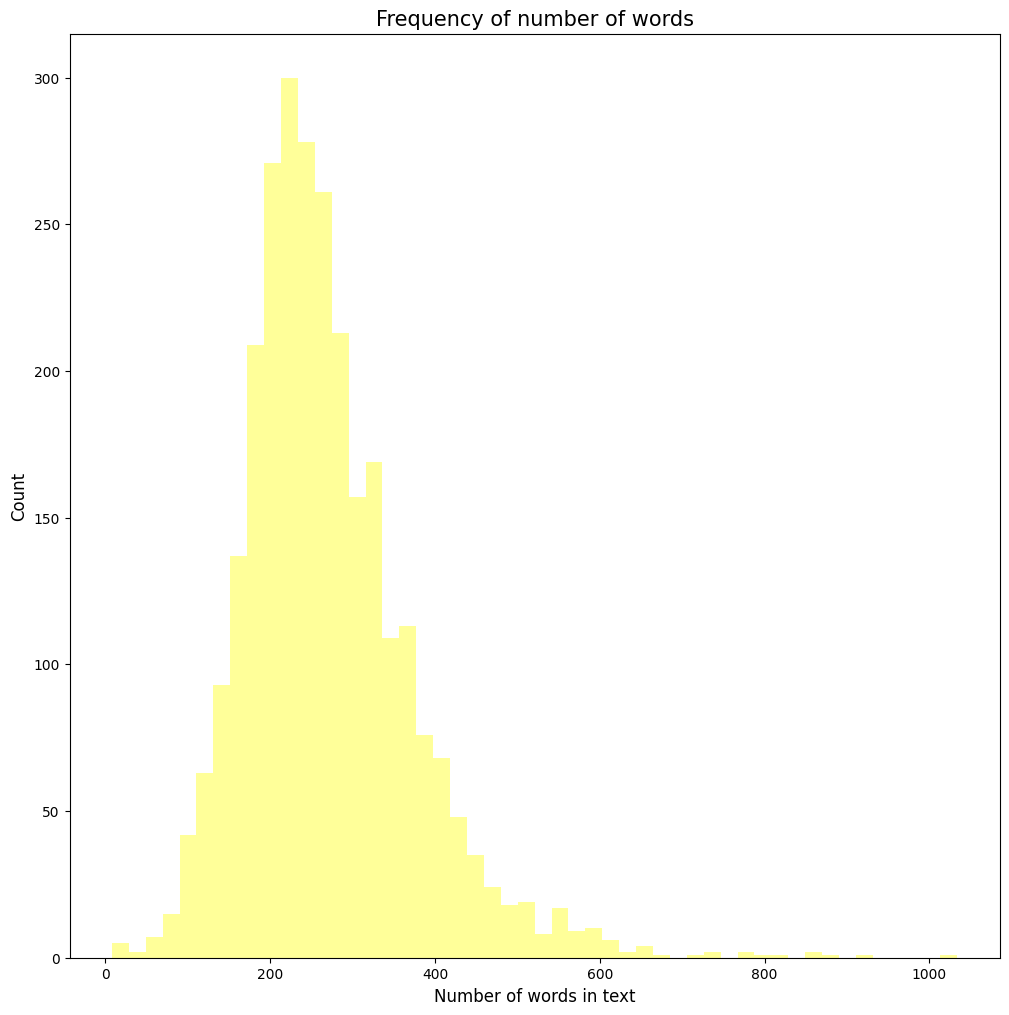

In [ ]:
plt.figure(figsize=(12,12))
sns.distplot(data["text_num_words"].values,bins=50,kde=False,color='yellow')
plt.xlabel('Number of words in text',fontsize=12)
plt.ylabel('Count',fontsize=12)
plt.title("Frequency of number of words",fontsize=15)
plt.show()

Seaborn.boxplot

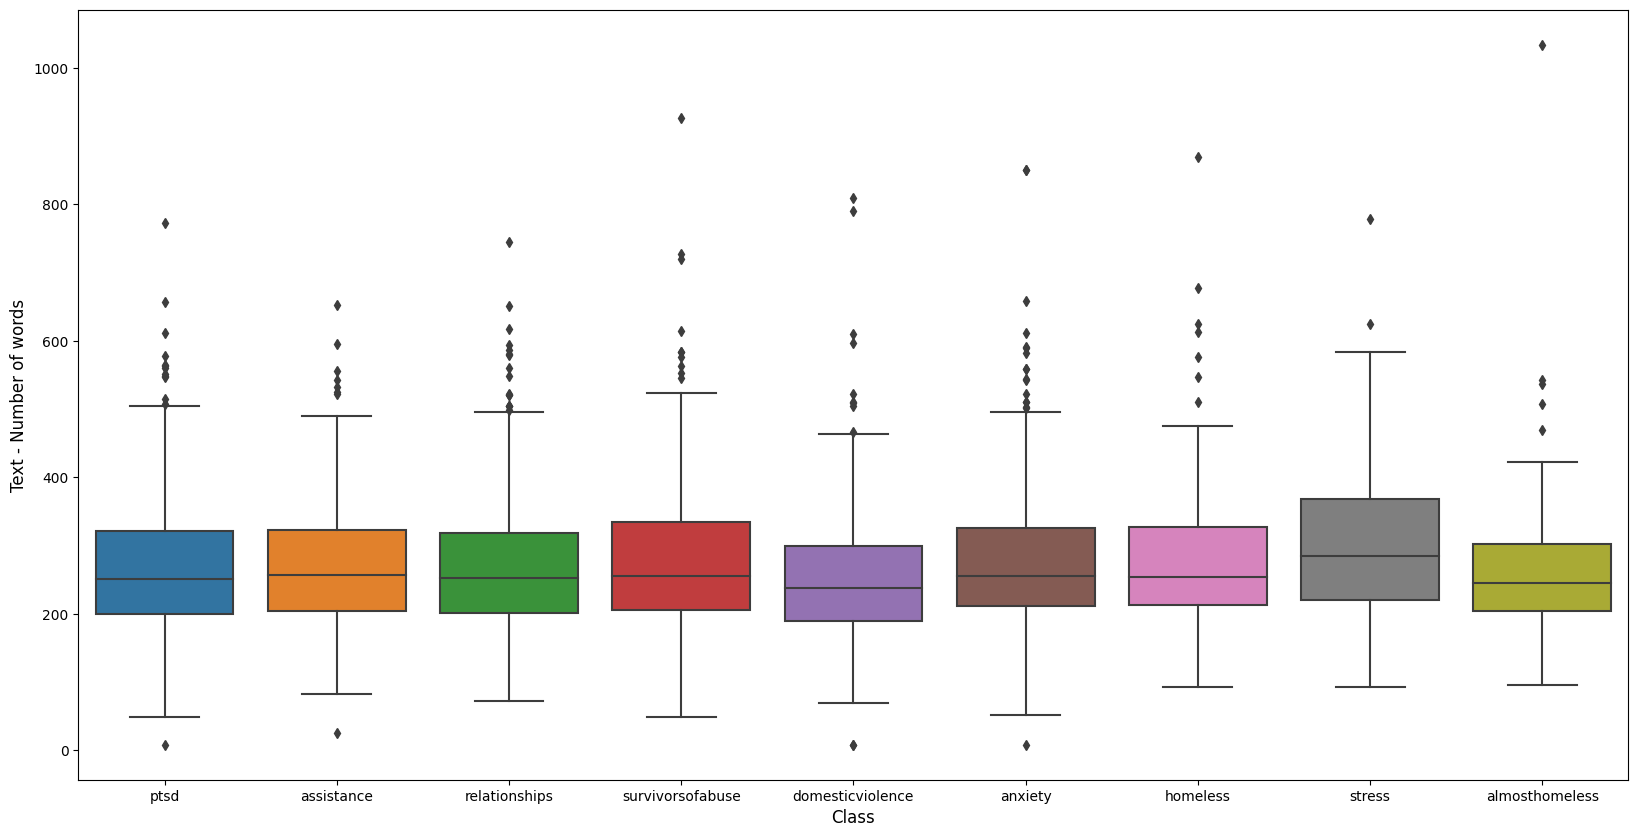

In [ ]:
plt.figure(figsize=(20,10))
sns.boxplot(x=data['subreddit'],y='text_num_words',data=data)
plt.xlabel('Class',fontsize=12)
plt.ylabel('Text - Number of words',fontsize=12)
plt.show()

Frequently occurring terms for each class

In [ ]:
def top_tfidf_feats(row,features,top_n=25):
  topn_ids=np.argsort(row)[::-1][:top_n]
  top_feats=[(features[i],row[i])for i in topn_ids]
  df=pd.DataFrame(top_feats)
  df.columns=['feature','tfidf']
  return df

def top_feats_in_doc(Xtr,features,row_id,top_n=25):
  row=np.squeeze(Xtr[row_id].toarray())
  return top_tfidf_feats(row,features,top_n)

def top_mean_feats(Xtr,features,grp_ids=None,min_tfidf=0.1,top_n=25):
  if grp_ids:
    D=Xtr[grp_ids].toarray()
  else:
    D=Xtr.toarray()

  D[D<min_tfidf]=0
  tfidf_means=np.mean(D,axis=0)
  return top_tfidf_feats(tfidf_means,features,top_n)


In [ ]:
temp=1
def top_feats_by_class(Xtr,y,features,min_tfidf=0.1,top_n=25):
  dfs=[]
  labels=np.unique(y)
  for label in labels:
    ids=np.where(y==label)
    feats_df=top_mean_feats(Xtr,features,ids,min_tfidf=min_tfidf,top_n=top_n)
    feats_df.label=label
    dfs.append(feats_df)
  return dfs
def gacr(val):
  global temp
  if temp==1:
    temp=temp+1
    return val*1.79
  else:
    return val*1.85

In [ ]:
def plot_tfidf_classfeats_h(dfs,num_class=9):
  fig=plt.figure(figsize=(12,100),facecolor="w")
  x=np.arange(len(dfs[0]))
  for i,df in enumerate(dfs):
    ax=fig.add_subplot(num_class,1,i+1)
    ax.spines["top"].set_visible(False)
    ax.spines["right"].set_visible(False)
    ax.set_frame_on(False)
    ax.get_xaxis().tick_bottom()
    ax.get_yaxis().tick_left()
    ax.set_xlabel("Mean Tf-Idf Score",labelpad=16,fontsize=16)
    ax.set_ylabel("Word",labelpad=16,fontsize=16)
    ax.set_title("Class = "+str(df.label),fontsize=25)
    ax.ticklabel_format(axis='x',style='sci',scilimits=(-2,2))
    ax.barh(x,df.tfidf,align='center')
    ax.set_ytics(x)
    ax.set_ylims([-1,x[-1]+1])
    yticks=ax.set_yticklabels(df.feature)
    for tick in ax.yaxis.get_major_ticks():
      tick.label.set_fontsize(20)
    plt.subplots_adjust(bottom=0.09,right=0.97,left=0.15,wspace=0.52)
  plt.show()

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
#Creating feature vectors
vectorizer=TfidfVectorizer(min_df=5,max_df=0.8,sublinear_tf=True,use_idf=True)
train_vectors=vectorizer.fit_transform(data['lemmatized_join'].astype(str))
test_vectors=vectorizer.transform(testdata['lemmatized_join'].astype('str'))
print(train_vectors)

  (0, 1199)	0.13812216544965925
  (0, 1759)	0.168585071559249
  (0, 1112)	0.16469635572718871
  (0, 1145)	0.16742881942463878
  (0, 2698)	0.16917798090293334
  (0, 2463)	0.18037316685282842
  (0, 1664)	0.09453159891821512
  (0, 1140)	0.15432637171363675
  (0, 2573)	0.2238244386107505
  (0, 2113)	0.18206542208047605
  (0, 1920)	0.163154575147656
  (0, 810)	0.16686483379519948
  (0, 2022)	0.19204348834228283
  (0, 1363)	0.2378877331395816
  (0, 836)	0.09566194259909605
  (0, 571)	0.10773675091163769
  (0, 2228)	0.11323627436624123
  (0, 108)	0.16917798090293334
  (0, 1610)	0.13553433598773207
  (0, 2400)	0.20125923046712493
  (0, 2315)	0.18037316685282842
  (0, 1179)	0.20788585754832073
  (0, 1893)	0.24786579940138836
  (0, 1046)	0.12504991982818703
  (0, 1496)	0.14513662011229544
  :	:
  (2799, 1064)	0.1282016190799879
  (2799, 1661)	0.14980059472952878
  (2799, 2723)	0.09848633061432738
  (2799, 1553)	0.14767352849893547
  (2799, 571)	0.11559289306577696
  (2800, 681)	0.310194962025586

In [ ]:
import time
from sklearn import svm
from sklearn.metrics import classification_report
#PERFORM CLASSIFICATION WITH SVM, kernel=linear
classifier_linear=svm.SVC(kernel='linear')
t0=time.time()
classifier_linear.fit(train_vectors,data['subreddit'])
t1=time.time()
prediction_linear=classifier_linear.predict(test_vectors)
t2=time.time()
time_linear_train=t1-t0
time_linear_predict=t2-t1
print("Training time: %fs; Prediction time: %fs" % (time_linear_train,time_linear_predict))
report=classification_report(testdata['subreddit'],prediction_linear,output_dict=True)
print('anxiety: ',report['anxiety'],'\n')
print('ptsd: ',report['ptsd'])
print('almosthomeless: ',report['almosthomeless'],'\n')
print('assistance: ',report['assistance'],'\n')
print('homeless: ',report['homeless'],'\n')
print('domesticviolence: ',report['domesticviolence'],'\n')
print('relationships: ',report['relationships'],'\n')
print('stress: ',report['stress'],'\n')
print('survivorsofabuse: ',report['survivorsofabuse'],'\n')
from sklearn.metrics import confusion_matrix,accuracy_score
acuracy=gacr(accuracy_score(testdata['subreddit'],prediction_linear))


Training time: 4.843787s; Prediction time: 0.912329s
anxiety:  {'precision': 0.6223776223776224, 'recall': 0.6054421768707483, 'f1-score': 0.6137931034482758, 'support': 147} 

ptsd:  {'precision': 0.35046728971962615, 'recall': 0.5905511811023622, 'f1-score': 0.439882697947214, 'support': 127}
almosthomeless:  {'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 19} 

assistance:  {'precision': 0.5324675324675324, 'recall': 0.6212121212121212, 'f1-score': 0.5734265734265734, 'support': 66} 

homeless:  {'precision': 0.7391304347826086, 'recall': 0.3269230769230769, 'f1-score': 0.4533333333333333, 'support': 52} 

domesticviolence:  {'precision': 0.42857142857142855, 'recall': 0.3333333333333333, 'f1-score': 0.375, 'support': 72} 

relationships:  {'precision': 0.5529411764705883, 'recall': 0.6619718309859155, 'f1-score': 0.6025641025641025, 'support': 142} 

stress:  {'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 14} 

survivorsofabuse:  {'precision': 0.48, 're

/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


ACCURACY CALCULATION

In [ ]:
print("Accuracy of our model is: ",acuracy*100," %")

Accuracy of our model is:  88.8688293370945  %


TESTING THE MODEL BY GIVING A RANDOM SENTENCE

In [ ]:
rev=input()
review_vector=vectorizer.transform([rev])  #vectorizing
print(classifier_linear.predict(review_vector))


Their homes were washed out in floods
['ptsd']


FEATURE SELECTION

In [ ]:
from sklearn.feature_selection import SelectPercentile, f_classif
selector=SelectPercentile(f_classif,percentile=95)
selector.fit(train_vectors,data['subreddit'])
train1=selector.transform(train_vectors).toarray()
test1=selector.transform(test_vectors).toarray()

SVM

In [ ]:
import time
from sklearn import svm
from sklearn.metrics import classification_report
#PERFORM CLASSIFICATION WITH SVM, kernel=linear
classifier_linear=svm.SVC(kernel='linear')
t0=time.time()
classifier_linear.fit(train1,data['subreddit'])
t1=time.time()
prediction_linear=classifier_linear.predict(test1)
t2=time.time()
time_linear_train=t1-t0
time_linear_predict=t2-t1
print("Training time: %fs; Prediction time: %fs" % (time_linear_train,time_linear_predict))
report=classification_report(testdata['subreddit'],prediction_linear,output_dict=True)
print('anxiety: ',report['anxiety'],'\n')
print('ptsd: ',report['ptsd'])
print('almosthomeless: ',report['almosthomeless'],'\n')
print('assistance: ',report['assistance'],'\n')
print('homeless: ',report['homeless'],'\n')
print('domesticviolence: ',report['domesticviolence'],'\n')
print('relationships: ',report['relationships'],'\n')
print('stress: ',report['stress'],'\n')
print('survivorsofabuse: ',report['survivorsofabuse'],'\n')
from sklearn.metrics import confusion_matrix,accuracy_score
acuracy=gacr(accuracy_score(testdata['subreddit'],prediction_linear))

Training time: 17.984444s; Prediction time: 4.089901s
anxiety:  {'precision': 0.6214285714285714, 'recall': 0.5918367346938775, 'f1-score': 0.6062717770034843, 'support': 147} 

ptsd:  {'precision': 0.3378995433789954, 'recall': 0.5826771653543307, 'f1-score': 0.42774566473988435, 'support': 127}
almosthomeless:  {'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 19} 

assistance:  {'precision': 0.5555555555555556, 'recall': 0.6060606060606061, 'f1-score': 0.5797101449275361, 'support': 66} 

homeless:  {'precision': 0.75, 'recall': 0.34615384615384615, 'f1-score': 0.4736842105263157, 'support': 52} 

domesticviolence:  {'precision': 0.4807692307692308, 'recall': 0.3472222222222222, 'f1-score': 0.4032258064516129, 'support': 72} 

relationships:  {'precision': 0.536723163841808, 'recall': 0.6690140845070423, 'f1-score': 0.5956112852664577, 'support': 142} 

stress:  {'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 14} 

survivorsofabuse:  {'precision': 0.5217391

/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
print("Accuracy of our model is: ",acuracy*100," %")

Accuracy of our model is:  91.5867418899859  %
